# HEAD

In [1]:
# import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import relo_ode as ro


0.0012128881257165093 0.9991469919675307


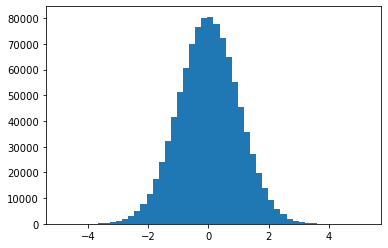

In [5]:
df=pd.read_table("./data.txt",sep="\s+",header=None)
df=pd.read_table("./jsm/cuda/noise.txt",sep=",",header=None)
data=np.loadtxt("./data.txt")

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(data,bins=50)
print(data.mean(),data.std(ddof=1))
plt.show()


0.0017921721252600002 0.5783627394939939


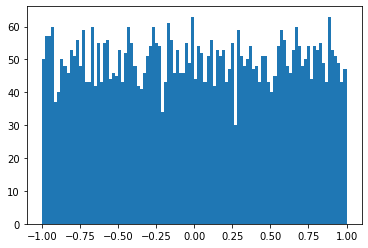

In [5]:
data=np.loadtxt("./test/data_real.txt")

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(data,bins=100)
print(data.mean(),data.std(ddof=1))
plt.show()


In [19]:

# df=pd.read_table("./jsm/data_time100_1000.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/cuda/data_cuda.txt",names=["step","vm","vi","vivj"],sep=',')
df=pd.read_table("./jsm/cuda/A10_R1e5_T0001/cuda_data_time001.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/cuda/data_cuda.txt",names=["step","vm","vi","vivj"],sep=',')
df["var"]=df.vi - df.vm**2
# df["var"]=df.vi - 1
df["cij"]=(df.vivj - df.vm**2)#/(df.var)
df

,step,vm,vi,vivj,var,cij
0,0,1.000060,1.00111,1.00012,0.000990,-3.600000e-09
1,1,1.000290,1.00258,1.00058,0.002000,-8.410000e-08
2,2,1.000260,1.00353,1.00053,0.003010,9.932400e-06
3,3,1.000330,1.00468,1.00067,0.004020,9.891100e-06
4,4,1.000420,1.00584,1.00084,0.005000,-1.764000e-07
...,...,...,...,...,...,...
99994,99994,0.517879,251.45300,173.39200,251.184801,1.731238e+02
99995,99995,0.516130,246.31500,171.68600,246.048610,1.714196e+02
99996,99996,0.516242,246.47400,171.84500,246.207494,1.715785e+02
99997,99997,0.513584,238.48600,168.70000,238.222231,1.684362e+02


In [15]:
t2,var2,corr2=ro.rel_rk(0.01,T=100,N=10)

e:\Projects\money_dynamics\relo_ode.py:53: RuntimeWarning: invalid value encountered in true_divide
  return t,ym[:,0]-1, np.divide((ym[:,1]-1),ym[:,0]-1)


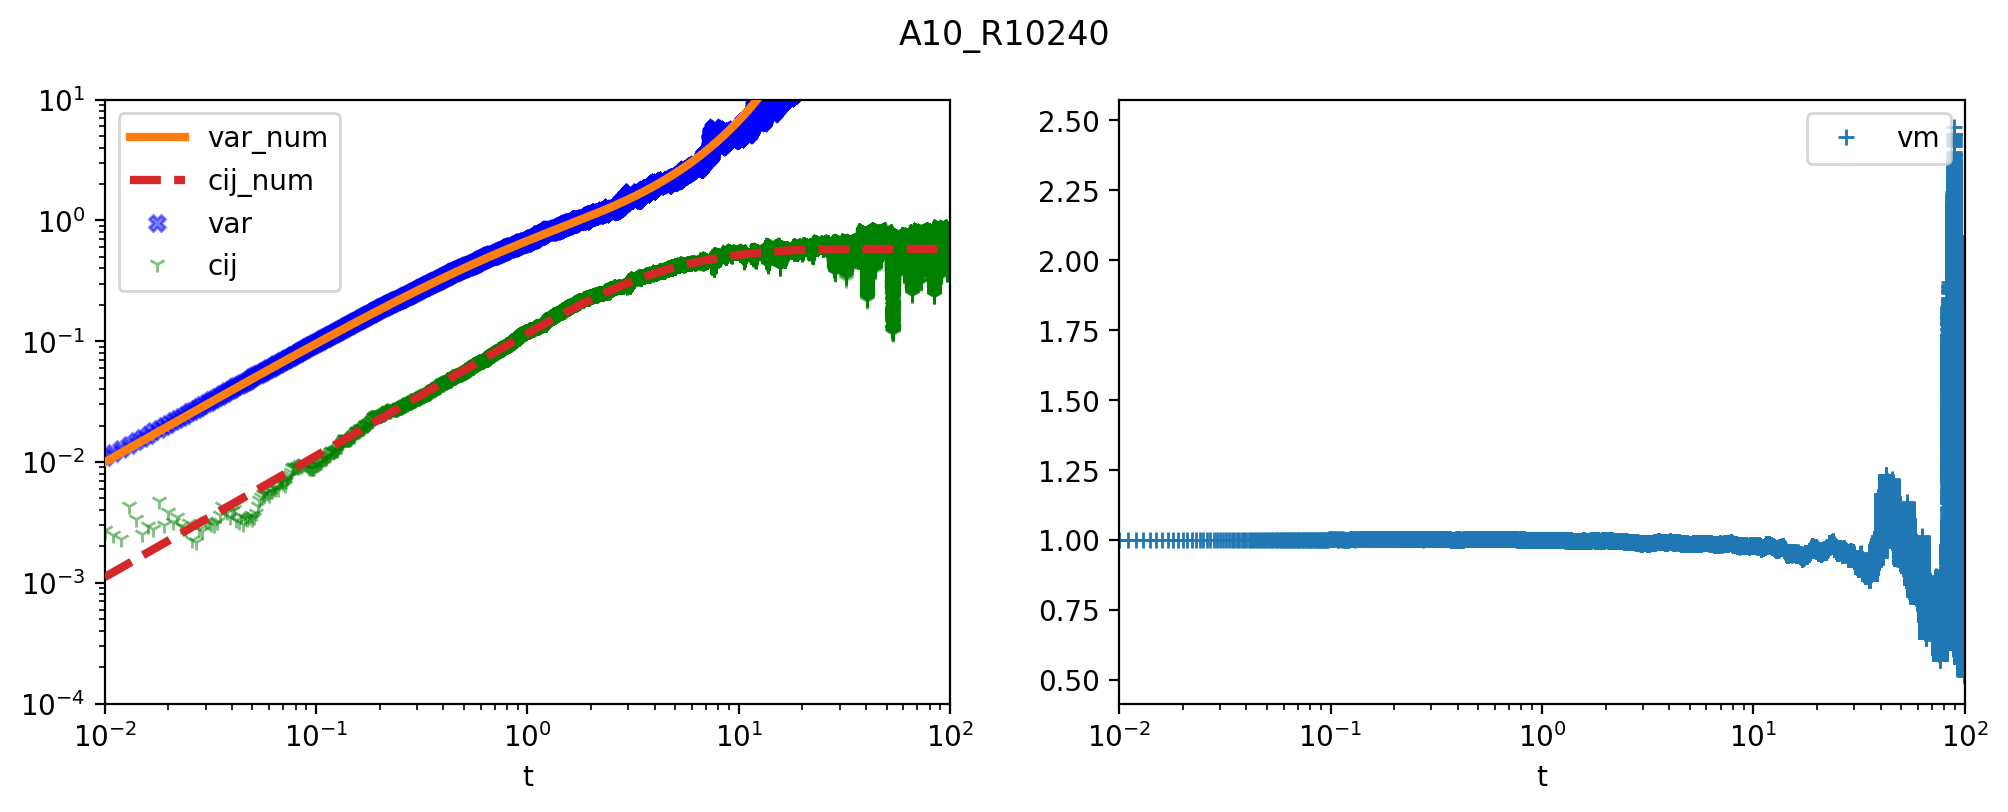

In [20]:
fig=plt.figure(figsize=(12,4),dpi=200)
ax=fig.add_subplot(1,2,1)

ax.plot(t2,var2,lw=3,c="C1",label="var_num",zorder=3)
ax.plot(t2,corr2,'--',lw=3,c="C3",label="cij_num",zorder=3)

inters=1
dfx=df.step.values[::inters]*0.001
var1=df["var"].values[::inters]
cij2=df["cij"].values[::inters]/var1

ax.plot(dfx,var1,'X',c='b',label="var",alpha=0.5,zorder=1)
ax.plot(dfx,cij2,'1',c='g',label="cij",alpha=0.5,zorder=1)
# ax.set_xlim([1e-1,1e4])
# ax.set_ylim([1e-3,1e2])

ax.set_xlabel('t')
ax.set_xlim([1e-2,1e2])
ax.set_ylim([1e-4,1e1])

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

ax=fig.add_subplot(1,2,2)
ax.plot(dfx,df["vm"],'+',label="vm")
ax.set_xlabel('t')
ax.set_xlim([1e-2,1e2])

ax.set_xscale('log')
ax.legend()

fig.suptitle("A10_R10240")
plt.show()


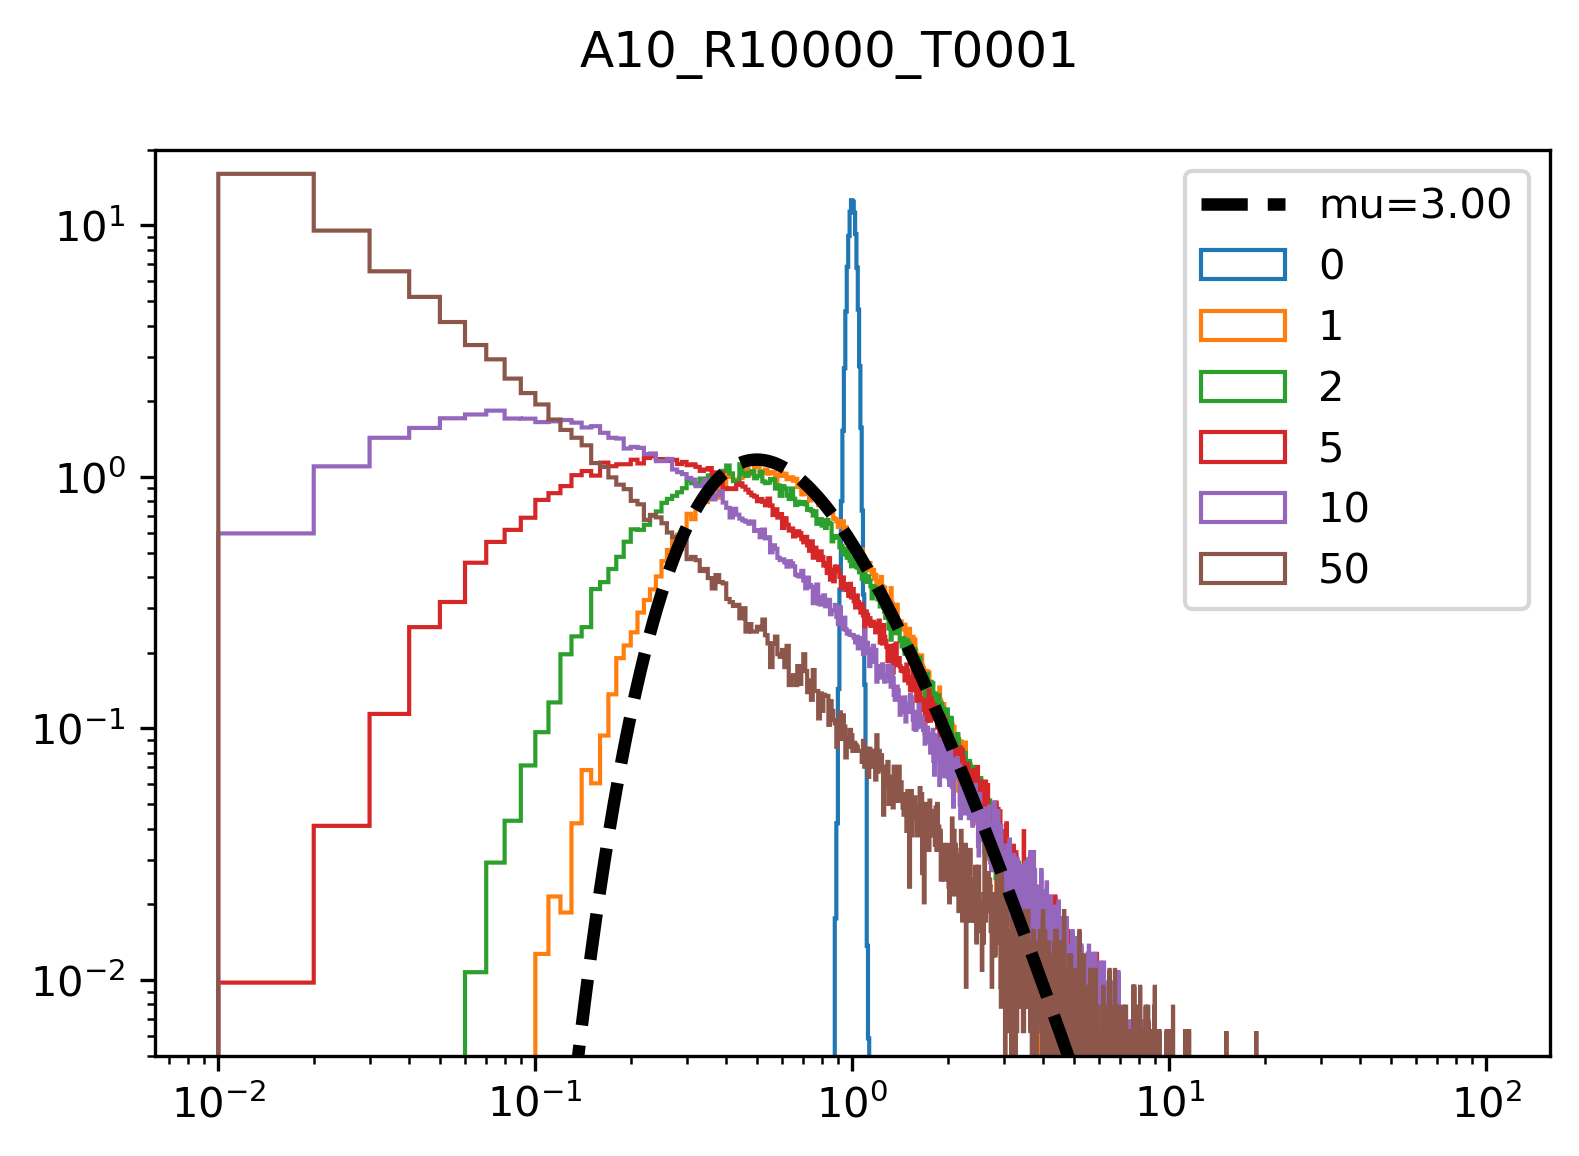

In [12]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot()

# for i in range(0,10,1):
for i in [0,1,2,5,10,50]:
    n=i*1000
    # df=pd.read_table("./jsm/A10000_R1000_T001/data_time001.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R1000_T001/data_time1000_1000.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/cuda/data_time001.%d.txt"%n,sep=',',header=None)
    df=pd.read_table("./jsm/cuda/A10_R1e5_T0001/cuda_data_time001.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R1000_T001-2/data_time001.%d.txt"%n,sep=',',header=None)
    data=df.values
    # data=data[~np.isnan(data)].reshape(10240,10).mean(axis=1)
    # data=data[~np.isnan(data)]
    # print(n,data.mean(),data.std(ddof=1))
    data=data[~np.isnan(data)].reshape(10240,10)#.mean(axis=1)
    # norm = data.mean(axis=1).reshape(10240,1)
    # data=data/norm

    ax.hist(data.flatten(),bins=np.linspace(0.01,100,10000),histtype='step',label='%d'%(n*0.001),density=True)
    # ax.hist(data,bins=np.linspace(0.1,10,100),histtype='step',label='%d'%i)
# hi,bi=np.histogram(data,bins=100)
# ax.plot(bi[:-1],hi)
w=np.arange(0.01,100,0.001)
miu=3
# miu=0.5
peq=np.exp(-(miu-1)/w)/w**(1+miu)
peq=peq/(peq*(w[1]-w[0])).sum()
ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%miu)

ax.set_ylim([5e-3,20])
# ax.set_xlim([1e-1,10])

# ax.set_ylim([5e-3,6])
# ax.set_xlim([5e-2,10])

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
fig.suptitle("A10_R10000_T0001")
plt.show()

## cal vij

In [31]:
df=pd.read_table("./jsm/cuda/1/cuda_data_time001.txt",names=["step","vm","vi","vivj"],sep=',')
df["var"]=df.vi - df.vm**2
# df["var"]=df.vi - 1
df["cij"]=(df.vivj - df.vm**2)#/(df.var)
df

,step,vm,vi,vivj,var,cij
0,0,1.00000,1.01001,0.671242,0.01001,-0.328758
1,1,1.00002,1.01993,0.671276,0.01989,-0.328764
2,2,1.00002,1.02974,0.672291,0.02970,-0.327749
3,3,1.00002,1.03943,0.675289,0.03939,-0.324751
4,4,1.00002,1.04903,0.679884,0.04899,-0.320156
5,5,1.00002,1.05855,0.685342,0.05851,-0.314698
6,6,1.00002,1.06797,0.691100,0.06793,-0.308940
7,7,1.00003,1.07731,0.696784,0.07725,-0.303276
8,8,1.00004,1.08659,0.702224,0.08651,-0.297856
9,9,1.00005,1.09574,0.707293,0.09564,-0.292807


In [32]:
n=1
df=pd.read_table("./jsm/cuda/1/cuda_data_time001.%d.txt"%n,sep=',',header=None)
# df=pd.read_table("./jsm/A1000_R1000_T001-2/data_time001.%d.txt"%n,sep=',',header=None)
data=df.values
# data=data[~np.isnan(data)].reshape(1000,1000).mean(axis=1)
data=data[~np.isnan(data)]

In [40]:
def cal_vij(a):
    vij=0
    m=0
    for i in range(len(a)):
        for j in range(i+1,len(a)):
            vij +=a[i]*a[j]
            m+=1
    return vij/m

In [41]:
cal_vij(data[:10000])

1.0002448625683933

In [ ]:
a=10
for i in range(1024):
    a+=cal_vij(data[i*10000:i*10000+10000])
print(a/10)